---
title: Fabry-Perot Cavities and Laser Oscillators
date: 2025-01-26
authors:
  - name: Craig Cahillane
    orcid: 0000-0002-3888-314X
    affiliations:
      - Syracuse University
numbering:
  heading_1: true
  heading_2: true
  heading_3: true
---

A Fabry-Perot two-mirror optical cavity is the fundamental building block of laser physics.\
With it, we have built the first lasers and masers,
created optical clocks
and detected gravitational waves.

Here we will dive deeply into the basics of a Fabry-Perot.\
We will come back to this formalism a dozen times throughout this course, 
and develop some matrix mechanics and other math required to understand it.

In [4]:
#| "tags": [ "hide-input",]
%matplotlib widget
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import *

plt.style.use('dark_background')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": False,
        "figure.figsize": (9, 6),
        # "figure.autolayout": True,
        # "font.family": "serif",
        # "font.serif": "georgia",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

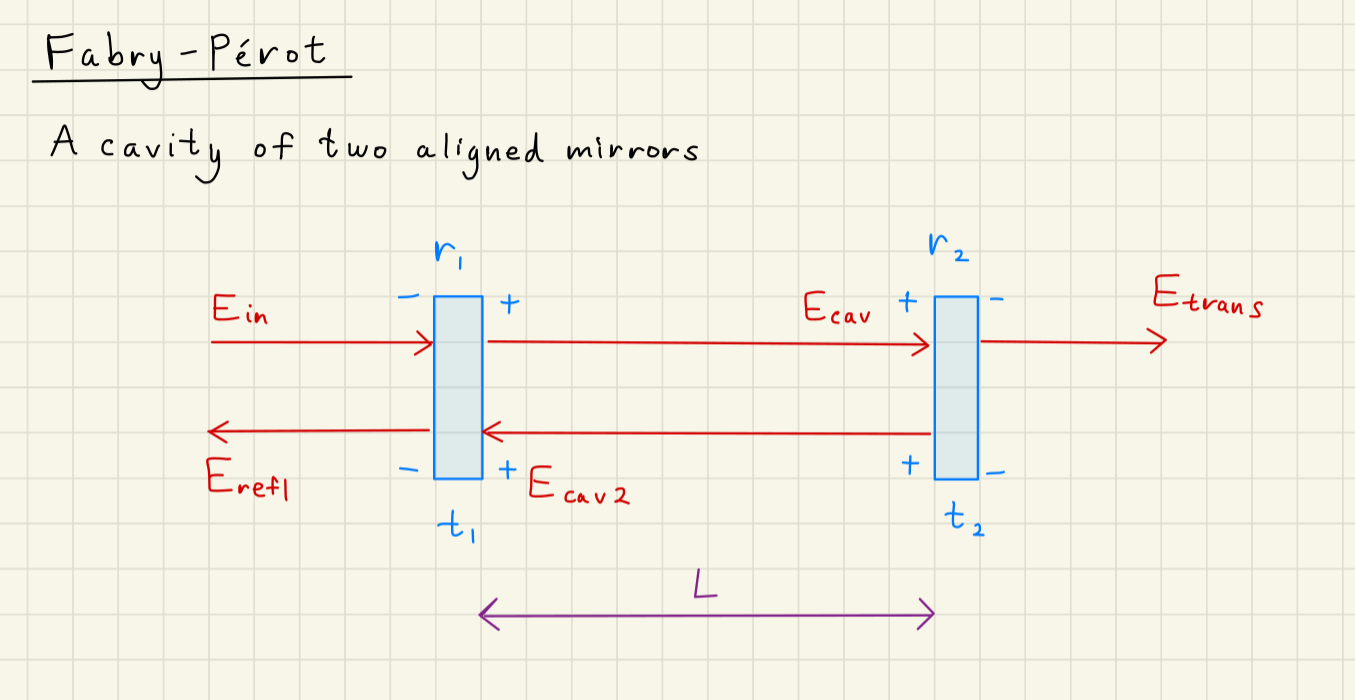

Fabry-Perot illustration

A Fabry-Perot cavity is two mirrors aligned with some space $L$ between them.\
The mirrors are labeled $r_1$ and $r_2$, which represents their *amplitude reflectivity*,\
and $t_1$ and $t_2$ which are the *amplitude transmission*.\
The amplitude coefficients are related to our more commonly reported *power reflectivity* $R$ and *power transmission* $T$ like
\begin{align}
R = |r|^2, \quad T = |t|^2
\end{align}

The red arrows represent electric fields, which act as nodes on a directed graph.
The arrow direction illustrates the transitions on the graph.\
We have one input above: $E_\mathrm{in}$, which represents the input laser.\
$E_\mathrm{in}$ represents all the field strength that will interact with the cavity.

$E_\mathrm{in}$ will have two transitions: one to $E_\mathrm{cav}$, and another to $E_\mathrm{refl}$.
These represent the intracavity field and the cavity reflected field.
These will be influenced by the reflectivity of the mirrors, as we will see.

Note we have two outputs from our system: $E_\mathrm{refl}$ and $E_\mathrm{trans}$.\
$E_\mathrm{trans}$ represets the total cavity transmitted field.\
Because power must be conserved, we can write the following:
\begin{align}
P_\mathrm{in} &= P_\mathrm{out}\\
|E_\mathrm{in}|^2 &= |E_\mathrm{refl}|^2 + |E_\mathrm{trans}|^2
\end{align}
The above power conservation assumes no loss inside the Fabry-Perot cavity.

We will assume that our incident $E_\mathrm{in}$ is a plane-wave, and we'll find the plane-wave solutions to the Fabry-Perot cavity below.

# Scattering Matrices
Before we dive into the analysis of the Fabry Perot, we need to understand its parts.
We will investigate the effect of mirrors and propogation distances on electric fields,
and how these can be described with *scattering matrices*.

## General Scattering Matrix
Suppose we have two electric fields $E_1$ and $E_2$ incident on an general optical object $\boldsymbol{M}$.  
$E_1$ and $E_2$ are both electric field phasors with the same optical axis and polarization, 
but opposite wavenumbers $\boldsymbol{k}_1 = -\boldsymbol{k}_2$.

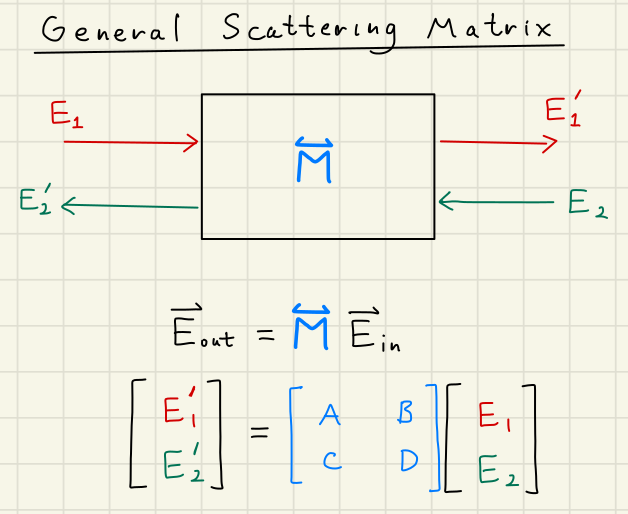

We can describe their interaction $\boldsymbol{M}$ like
\begin{align}
\vec{E}_\mathrm{out} &= \boldsymbol{M} \vec{E}_\mathrm{in}\\
\begin{bmatrix} E_1' \\ 
E_2'
\end{bmatrix} 
&= \begin{bmatrix} A & B \\ 
 C & D
\end{bmatrix} 
\begin{bmatrix} E_1' \\ 
E_2'
\end{bmatrix} 
\end{align}

The components $A$ and $D$ describe the action of the object $\boldsymbol{M}$ on the beam transmitted through the object: 
$$E_1' = A E_1 \\ E_2' = D E_2 $$
This can include phase changes, absorption, and transmission coefficients.\
However, the object may partially or totally reflect the incident beams back along the optical axis.
This is described by the $B$ and $D$ components.

In this manner, we have described a *general $2 \times 2$ scattering matrix* for our beams travelling in two directions.
One can imagine that we can add many different bases to make an $n \times n$ scattering matrix, 
describing changes to the electric field frequencies, polarization, or direction.
The $2 \times 2$ scattering matrix is good enough for our plane-wave Fabry-Perot solutions, as we'll see below.

## Propogation Distance
